In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
pew = pd.read_csv("data/pew-raw.csv")
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [3]:
tidy_pew = pew.melt(id_vars = "religion", var_name = "income", value_name = "count")
tidy_pew.head(20)

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


In [4]:
#multiple variables stored in 1 column
df_tb=pd.read_csv('data/tb-raw.csv')
df_tb.columns

Index(['country', 'year', 'm014', 'm1524', 'm2534', 'm3544', 'm4554', 'm5564',
       'm65', 'mu', 'f014'],
      dtype='object')

In [5]:
df_tb.tail()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


In [6]:
# Applying melt (to a long format)
df_tb=df_tb.melt(id_vars=["country","year"],var_name=["demographic"],value_name="cases")
df_tb.sample(5)

,country,year,demographic,cases
75,AM,2000,mu,NaN
59,AS,2000,m5564,1.0
10,AD,2000,m1524,0.0
13,AG,2000,m1524,0.0
43,AG,2000,m4554,0.0


In [7]:
# Creating new columns for sex and age
df_tb=(df_tb.assign(sex = lambda x: x.demographic.str[0].astype(str),
age = lambda x: x.demographic.str[1:].astype(str))
      .drop("demographic",axis=1))
df_tb.head(5)

,country,year,cases,sex,age
0,AD,2000,0.0,m,014
1,AE,2000,2.0,m,014
2,AF,2000,52.0,m,014
3,AG,2000,0.0,m,014
4,AL,2000,2.0,m,014


In [8]:
# Styling the dataset
df_tb.update(pd.DataFrame({"age":[age[:2]+'-'+age[2:] if len(age) == 4 else (age) for age in df_tb["age"]]}))
df_tb=(df_tb.replace(to_replace =["m","f","014","65","u"],value =["Male","Female","0-14","65+","unknown"])
            .dropna())
df_tb.sample(10)

,country,year,cases,sex,age
52,AF,2000,94.0,Male,55-64
21,AE,2000,4.0,Male,25-34
59,AS,2000,1.0,Male,55-64
35,AM,2000,131.0,Male,35-44
41,AE,2000,5.0,Male,45-54
51,AE,2000,12.0,Male,55-64
20,AD,2000,1.0,Male,25-34
83,AG,2000,1.0,Female,0-14
67,AO,2000,194.0,Male,65+
84,AL,2000,3.0,Female,0-14


In [9]:
#Variables are stored in both rows and columns.
weather = pd.read_csv("data/weather-raw.csv")
weather

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
(weather.
  melt(id_vars = ["id", "year", "month", "element"], var_name = "day", value_name = "temp").
  pivot_table(index = ["id", "year", "month", "day"],
              columns = "element",
              values = "temp").
  reset_index().
  head()
)

element,id,year,month,day,tmax,tmin
0,MX17004,2010,2,d2,NaN,14.4
1,MX17004,2010,2,d3,NaN,14.4
2,MX17004,2010,3,d5,32.1,14.2
3,MX17004,2010,2,d2,27.3,NaN
4,MX17004,2010,2,d3,24.1,NaN


In [11]:
#multiple types of data in 1 table
billboard = pd.read_csv("data/billboard_cleaned.csv")

In [12]:
billboard.head(15)

,year,artist,time,track,date,week,rank
0,2000,2 Pac,4:22,Baby Don't Cry (Keep Ya Head Up II),2000-02-26,1,87
1,2000,2 Pac,4:22,Baby Don't Cry (Keep Ya Head Up II),2000-03-04,2,82
2,2000,2 Pac,4:22,Baby Don't Cry (Keep Ya Head Up II),2000-03-11,3,72
3,2000,2 Pac,4:22,Baby Don't Cry (Keep Ya Head Up II),2000-03-18,4,77
4,2000,2 Pac,4:22,Baby Don't Cry (Keep Ya Head Up II),2000-03-25,5,87
5,2000,2 Pac,4:22,Baby Don't Cry (Keep Ya Head Up II),2000-04-01,6,94
6,2000,2 Pac,4:22,Baby Don't Cry (Keep Ya Head Up II),2000-04-08,7,99
7,2000,2Ge+her,3:15,The Hardest Part Of Breaking Up (Is Getting Ba...,2000-09-02,1,91
8,2000,2Ge+her,3:15,The Hardest Part Of Breaking Up (Is Getting Ba...,2000-09-09,2,87
9,2000,2Ge+her,3:15,The Hardest Part Of Breaking Up (Is Getting Ba...,2000-09-16,3,92


In [13]:
# Get the unique combinations for the song DataFrame and
# "store" them in the original dataset for reuse.
billboard = billboard.set_index(["artist", "track", "time"])

# Create the song DataFrame.
songs = pd.DataFrame.from_records(
    columns=["id", "artist", "track", "time"],
    data=[  # Combine enumerate with tuple unpacking
        (a + 1, b, c, d)  # to create the ID column.
        for (a, (b, c, d)) in enumerate(billboard.index.unique())
    ],
)

# Take the date and rank columns from the original dataset
# and use the implicit index alignment to assign the songs' IDs.
ranking = billboard[["date", "rank"]].copy()
ranking["id"] = songs.set_index(["artist", "track", "time"])

# Use the song ID as the index as in the paper.
ranking = ranking.reset_index(drop=True).set_index("id")
songs = songs.set_index("id")

In [14]:
songs.head(15)

,artist,track,time
id,,,
1,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
2,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
3,3 Doors Down,Kryptonite,3:53
4,3 Doors Down,Loser,4:24
5,504 Boyz,Wobble Wobble,3:35
6,98¡,Give Me Just One Night (Una Noche),3:24
7,A*Teens,Dancing Queen,3:44
8,Aaliyah,I Don't Wanna,4:15
9,Aaliyah,Try Again,4:03


In [15]:
ranking.head(15)

,date,rank
id,,
1,2000-02-26,87
1,2000-03-04,82
1,2000-03-11,72
1,2000-03-18,77
1,2000-03-25,87
1,2000-04-01,94
1,2000-04-08,99
2,2000-09-02,91
2,2000-09-09,87


In [16]:
import glob
import re 

def extract_year(string):
    match = re.match(".+(\d{4})", string) 
    if match != None: return match.group(1)
    
path = './data'
allFiles = glob.glob(path + "/201*-baby-names-illinois.csv")
frame = pd.DataFrame()
df_list= []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df.columns = map(str.lower, df.columns)
    df["year"] = extract_year(file_)
    df_list.append(df)
    
df = pd.concat(df_list)
df.head(5)

,rank,name,frequency,sex,year
0,1,Noah,863,Male,2015
1,2,Liam,709,Male,2015
2,3,Alexander,703,Male,2015
3,4,Jacob,650,Male,2015
4,5,William,618,Male,2015


In [17]:
#missing data
df = pd.read_csv("data/titanic_dataset.csv")

In [18]:
df.head(20)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583
7,0,1,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792
9,0,1,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042


In [20]:
#optional
df.drop("name",axis=1,inplace=True)
df.drop("ticket",axis=1,inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
newdf=df

In [22]:
#splitting the data into x and y
y = df['survived']
df.drop("survived",axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1309 non-null   int64  
 1   sex     1309 non-null   int64  
 2   age     1309 non-null   float64
 3   sibsp   1309 non-null   int64  
 4   parch   1309 non-null   int64  
 5   fare    1309 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


In [24]:
print(df.isnull().sum())

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64


In [39]:
iris = pd.read_csv('data/iris.csv')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [41]:
wine_reviews = pd.read_csv('data/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Text(0, 0.5, 'sepal_width')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


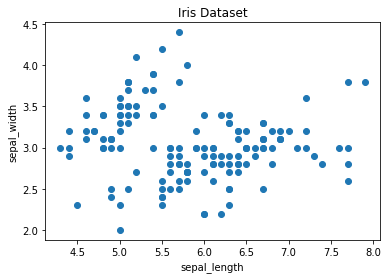

In [43]:
import matplotlib.pyplot as plt

# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])

# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

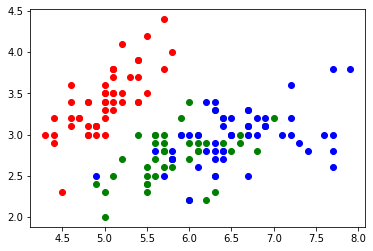

In [74]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

# create a figure and axis
fig, ax = plt.subplots()

 #plot each data-point
for i in range(len(iris['sepal_length'])):
   ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['species'][i]])

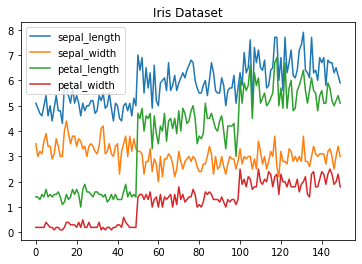

In [51]:
# get columns to plot
columns = iris.columns.drop(['species'])

# create x data
x_data = range(0, iris.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

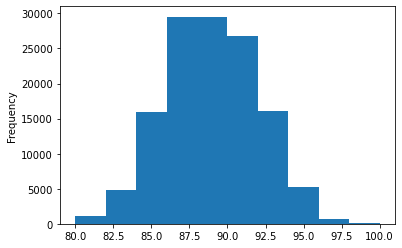

In [52]:
wine_reviews['points'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79c9247cd0>,
      dtype=object)

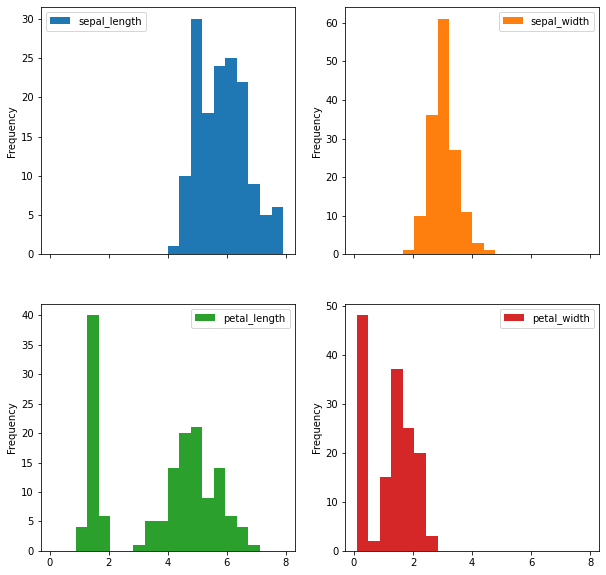

In [53]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

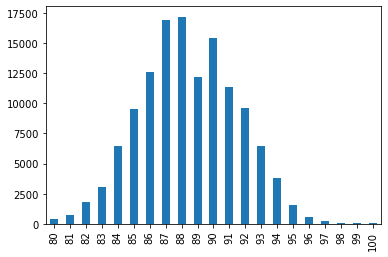

In [54]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

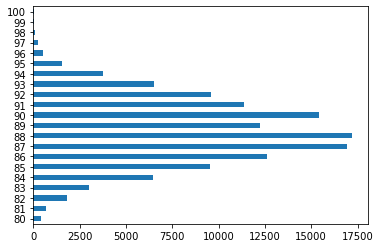

In [55]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

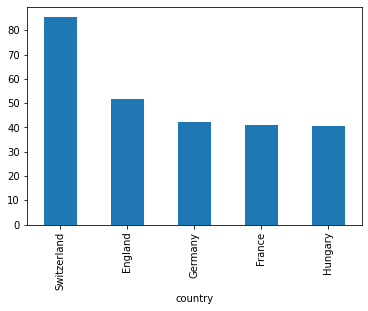

In [56]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

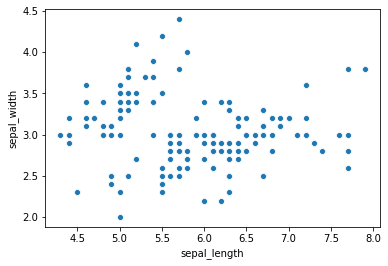

In [57]:
import seaborn as sns

sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

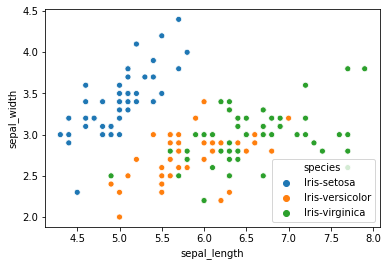

In [59]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

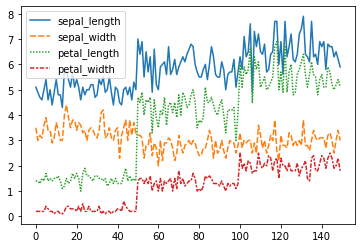

In [60]:
sns.lineplot(data=iris.drop(['species'], axis=1))

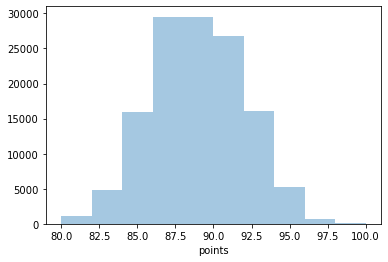

In [61]:
sns.distplot(wine_reviews['points'], bins=10, kde=False)

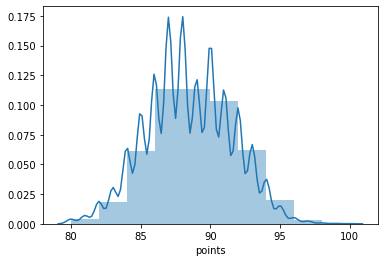

In [62]:
sns.distplot(wine_reviews['points'], bins=10, kde=True)

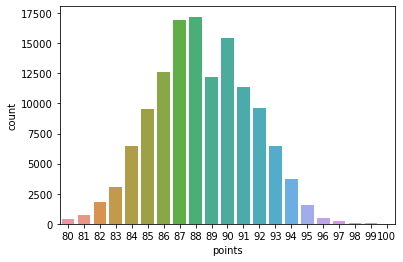

In [63]:
sns.countplot(wine_reviews['points'])

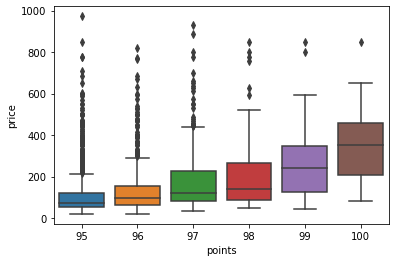

In [64]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

[None, None, None, None, None, None, None, None]

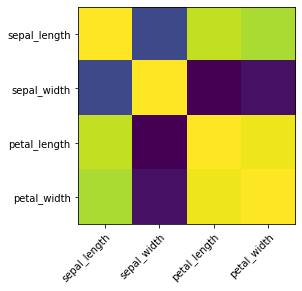

In [65]:
import numpy as np

# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

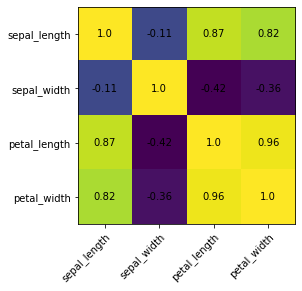

In [66]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

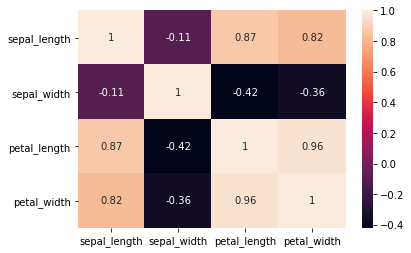

In [67]:
sns.heatmap(iris.corr(), annot=True)

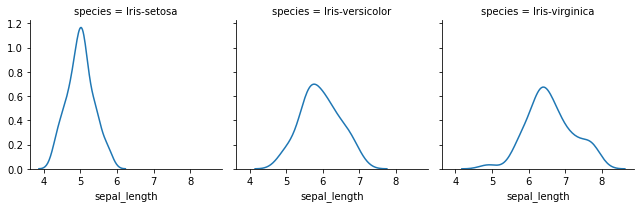

In [69]:
g = sns.FacetGrid(iris, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

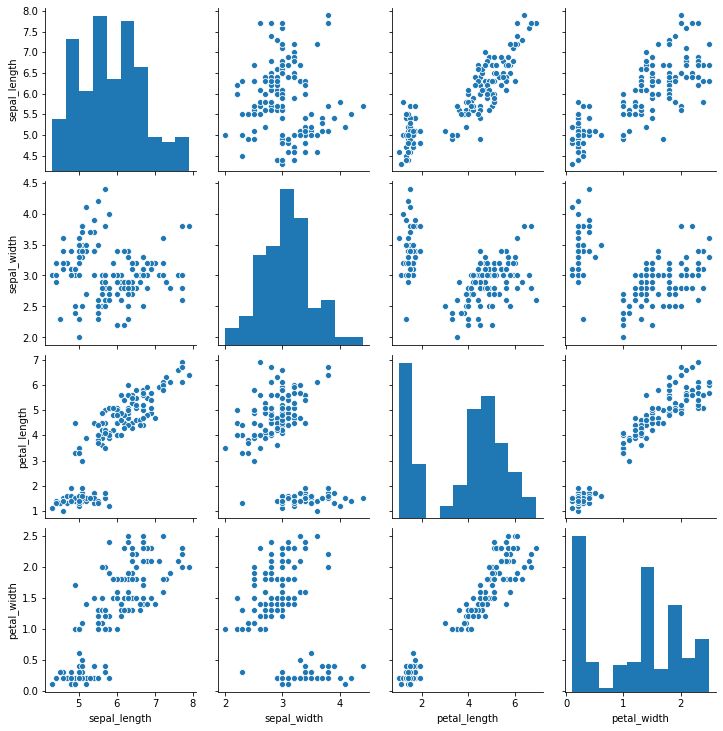

In [70]:
sns.pairplot(iris)

<ipython-input-71-ba082916ad38>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79b86c4550>,
      dtype=object)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


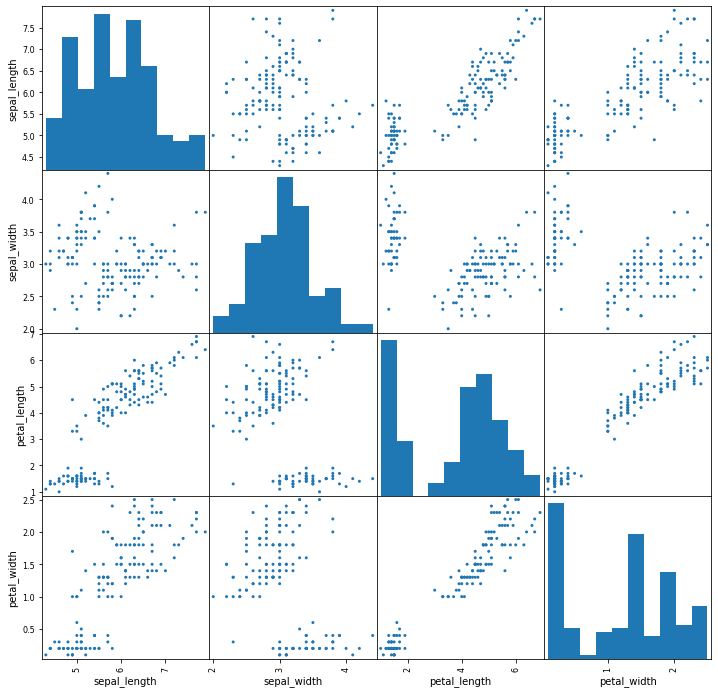

In [71]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)